# Portas Lógicas Quânticas
### Material Monitoria

Reinaldo Júnio Dias de Abreu
Ciência da Computação - 09/2020

### Carregando bibliotecas

In [1]:
%matplotlib inline
from qiskit import *
import matplotlib
from math import sqrt
from qiskit.tools.visualization import plot_histogram
from qiskit.visualization import plot_bloch_multivector
from qiskit.extensions import Initialize
qiskit.__qiskit_version__

# Para atualizar o qiskit
# pip install --upgrade qiskit

{'qiskit-terra': '0.15.2',
 'qiskit-aer': '0.6.1',
 'qiskit-ignis': '0.4.0',
 'qiskit-ibmq-provider': '0.10.0',
 'qiskit-aqua': None,
 'qiskit': '0.22.0'}

## Portas lógicas quânticas para 1 qubit

### Inicializando Circuito

In [2]:
nqubits = 1
circuito = QuantumCircuit(nqubits, nqubits)

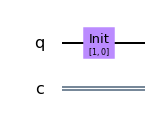

In [3]:
# Inicializando o Qubit
ket_0 = [1,0]
ket_1 = [0,1]
initializer = Initialize(ket_0)
initializer.label = "init"
circuito.append(initializer, [0])
circuito.draw(output='mpl')

### Aplicando portas de 1 qubit

Escolha a porta que quer simular descomentando a linha

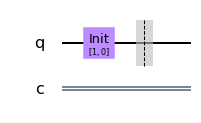

In [4]:
#circuito.i(0)  # Identidade
#circuito.h(0)  # Coloca os elementos da base em estado de sobreposição
#circuito.x(0)  # Inverte os elementos da base
#circuito.y(0)  # Equivale uma rotação em π no eixo Y
#circuito.z(0)  # Equivale uma rotação em π no eixo Z
#circuito.s(0)  # Fase, raiz da porta Z
#circuito.t(0)  # Toffoli (π/8, raiz da porta S)

circuito.barrier() # Divisão visual no circuito
circuito.draw(output='mpl')


### Simulando e exibindo resultados

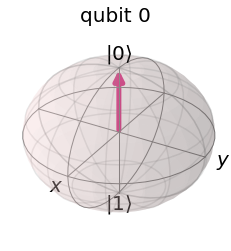

In [5]:
# Simulando estado do qubit e exibindo na esfera de bloch
# Nota: não se faz a medida para exibir na esfera de bloch, caso simular o circuito
#       com a medida, o estado exibido estará colapsado para um estado base |0> ou |1>
#       perdendo a informação contida.

simulator = Aer.get_backend('statevector_simulator')
out = execute(circuito, backend = simulator).result()
vector = out.get_statevector()
plot_bloch_multivector(vector)

### Simulando realizando medidas

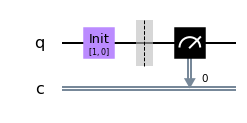

In [6]:
circuito.measure(0,0)
circuito.draw(output='mpl')

In [7]:
# Realizando a simulação do circuito 20 vezes e capturando os resuldados das medidas
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuito, backend = simulator, shots = 20).result()

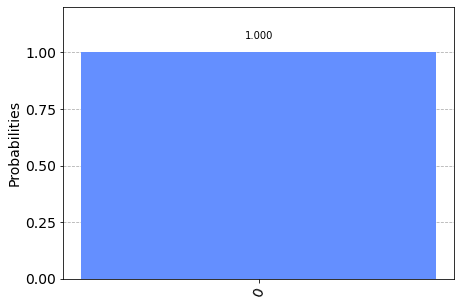

In [8]:
counts = result.get_counts()
plot_histogram(counts)

In [9]:
print(counts)

{'0': 20}


## Portas lógicas quânticas para 2 qubits

### Inicializando Circuito

In [10]:
nqubits = 2
circuito = QuantumCircuit(nqubits, nqubits)

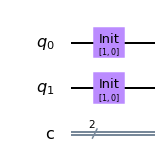

In [11]:
# Inicializando o Qubit
ket_0 = [1,0]
ket_1 = [0,1]

init1 = Initialize(ket_0)
init2 = Initialize(ket_0)

init1.label = "init"
init2.label = "init"

circuito.append(init1, [0])
circuito.append(init2, [1])

circuito.draw(output='mpl')

### Aplicando portas de 2 qubit

Escolha a porta que quer simular descomentando a linha

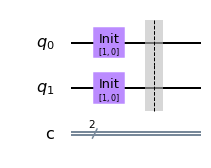

In [12]:
#circuito.cx(0,1)    # Não controlada (CNOT)
#circuito.cz(0,1)    # Z controlada
#circuito.cy(0,1)    # Y controlada
#circuito.swap(0,1)  # Swap (troca)

circuito.barrier()
circuito.draw(output='mpl')

### Simulando e exibindo resultados

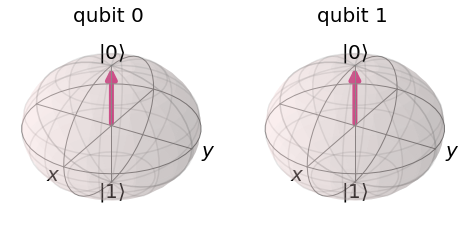

In [13]:
# Simulando estado do qubit e exibindo na esfera de bloch
# Nota: não se faz a medida para exibir na esfera de bloch, caso simular o circuito
#       com a medida, o estado exibido estará colapsado para um estado base |0> ou |1>
#       perdendo a informação contida.

simulator = Aer.get_backend('statevector_simulator')
out = execute(circuito, backend = simulator).result()
vector = out.get_statevector()
plot_bloch_multivector(vector)

### Simulando realizando medidas

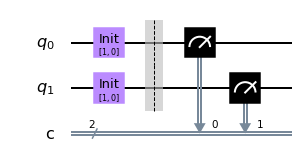

In [14]:
circuito.measure([0,1],[0,1])
circuito.draw(output='mpl')

In [15]:
# Realizando a simulação do circuito 20 vezes e capturando os resuldados das medidas
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuito, backend = simulator, shots = 20).result()

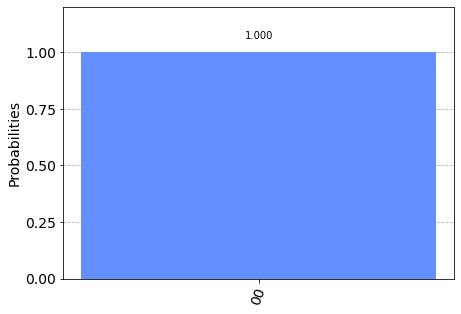

In [16]:
counts = result.get_counts()
plot_histogram(counts)

## Portas lógicas quânticas para 3 qubits

### Inicializando Circuito

In [17]:
nqubits = 3
circuito = QuantumCircuit(nqubits, nqubits)

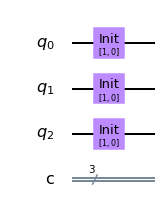

In [18]:
# Inicializando o Qubit
ket_0 = [1,0]
ket_1 = [0,1]

init1 = Initialize(ket_0)
init2 = Initialize(ket_0)
init3 = Initialize(ket_0)

init1.label = "init"
init2.label = "init"
init3.label = "init"

circuito.append(init1, [0])
circuito.append(init2, [1])
circuito.append(init3, [2])

circuito.draw(output='mpl')

### Aplicando portas de 3 qubit

Escolha a porta que quer simular descomentando a linha

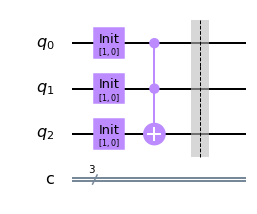

In [19]:
circuito.toffoli(0,1,2)  # Aplica X caso q0 e q1 for |1>

circuito.barrier()
circuito.draw(output='mpl')

### Simulando e exibindo resultados

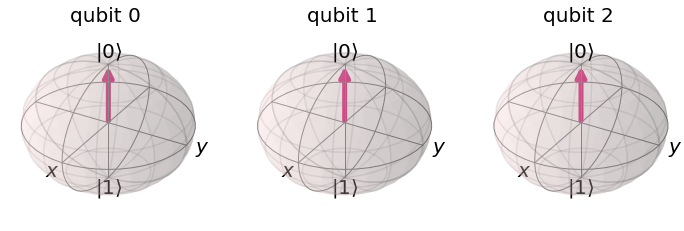

In [20]:
# Simulando estado do qubit e exibindo na esfera de bloch
# Nota: não se faz a medida para exibir na esfera de bloch, caso simular o circuito
#       com a medida, o estado exibido estará colapsado para um estado base |0> ou |1>
#       perdendo a informação contida.

simulator = Aer.get_backend('statevector_simulator')
out = execute(circuito, backend = simulator).result()
vector = out.get_statevector()
plot_bloch_multivector(vector)

### Simulando realizando medidas

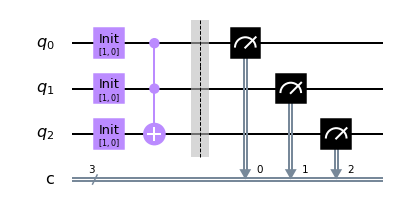

In [21]:
circuito.measure([0,1,2],[0,1,2])
circuito.draw(output='mpl')

In [22]:
simulator = Aer.get_backend('qasm_simulator')
result = execute(circuito, backend = simulator, shots = 1000).result()

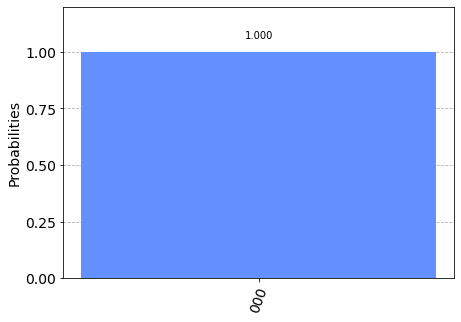

In [23]:
counts = result.get_counts()
plot_histogram(counts)